# Analysis of IMT 570 Survey

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import re

In [2]:
survey_raw = pd.read_csv('570 - Voice Assistants-report.csv')
survey = survey_raw

survey.columns = ['num','phone', 'phone_other', 'proficiency','duration', 'VA', 'usage', 
                  'u_na','u_calls','u_text', 'u_email', 'u_map', 'u_weather', 'u_contact', 'u_web', 'u_music', 'u_calendar',
                 'u_alarm', 'u_reminder', 'u_notes','u_sports','u_listing','u_social', 'u_restaurant','u_movies','u_friends',
                 'u_stock', 'u_facts', 'u_others', 'why_easier', 'why_faster', 'why_safer', 'why_fun',
                  'why_convenient', 'why_na','why_others', 'satisfied','reason_misunderstood', 'reason_answer',
                 'reason_difficulty', 'reason_discomfort', 'reason_language','reason_privacy','reason_traditional',
                 'reason_unaware','reason_na','reason_other', 'language','language_other', 'accent','accent_other',
                 'accent_differs', 'accent_affects', 'age', 'willingness', 'start_data', 'submit_date', 'network_id']

In [3]:
binary = []
binary_use = ['u_na','u_calls','u_text', 'u_email', 'u_map', 'u_weather', 'u_contact', 'u_web', 'u_music', 'u_calendar',
                 'u_alarm', 'u_reminder', 'u_notes','u_sports','u_listing','u_social', 'u_restaurant','u_movies','u_friends',
                 'u_stock', 'u_facts', 'u_others']

binary_why = ['why_easier', 'why_faster', 'why_safer', 'why_fun', 'why_convenient', 'why_na','why_others']

binary_reason = ['reason_misunderstood', 'reason_answer', 'reason_difficulty', 'reason_discomfort',
                 'reason_language','reason_privacy','reason_traditional', 'reason_unaware', 'reason_na', 'reason_other']

binary.extend(binary_use)
binary.extend(binary_why)
binary.extend(binary_reason)

for col_name in binary :
    survey[col_name].fillna(0, inplace=True)
    ind = survey[survey[col_name] != 0][col_name].index
    survey.loc[ind,col_name] = 1

survey['use'] = survey.loc[:,binary_use].values.astype(int).tolist()
survey['why'] = survey.loc[:,binary_why].values.astype(int).tolist()
survey['reason'] = survey.loc[:,binary_reason].values.astype(int).tolist()

# Drop the columns we have coded and combined above
survey.drop(survey.loc[:,binary], axis=1, inplace=True)

# These are not required or all NA's
not_required = ['num', 'phone_other', 'language_other', 'accent_other', 'accent_other', 'willingness', 
                'start_data', 'submit_date', 'network_id']

survey.drop(survey.loc[:,not_required], axis=1, inplace=True)

In [4]:
def barchart(display, ttl, reorder, label, colr):
    ent, entity, ec, entity_count = [], [], [], []
    if type(display) == str:
        ent, entity = survey.groupby([display]).count()['use'].index.tolist(), []
        ec, entity_count = survey.groupby([display]).count()['use'].tolist(), []
    else:
        ent = label
        ec = display
    
    if len(reorder) != 0:
        for order in reorder:
            entity.append(ent[order])
            entity_count.append(ec[order])
    else: 
        entity = ent
        entity_count = ec
    entity_count = pd.Series.from_array(entity_count)

    if len(colr) != 0:
        fig, ax = plt.subplots(1, figsize=(10, 8))
        bar_locations = np.arange(1, len(entity_count)+1, 1)
        ax.bar(bar_locations, entity_count, color=colr, alpha=0.4)
        lg = []
        for i in range(len(colr)): lg.append(mpatches.Patch(color=colr[i], label= entity[i], alpha =0.4))
        plt.legend(handles=lg)
    
    else:
        plt.figure(figsize=(10, 8))
        ax = entity_count.plot(kind='bar', color = 'purple', alpha=0.4)
        if len(label) == 0: ax.set_xticklabels(entity, fontsize = 15, rotation=0)
        else: ax.set_xticklabels(label, fontsize = 15, rotation=0)
        
    ax.set_title(ttl, fontsize = 20)
    ax.set_ylabel('Number of participants', fontsize = 15)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    rects = ax.patches
    for rect, label in zip(rects, entity_count):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height/2-0.8, label, ha='center', va='bottom', fontsize = 15)

    plt.savefig(ttl+'.png')
    plt.show()

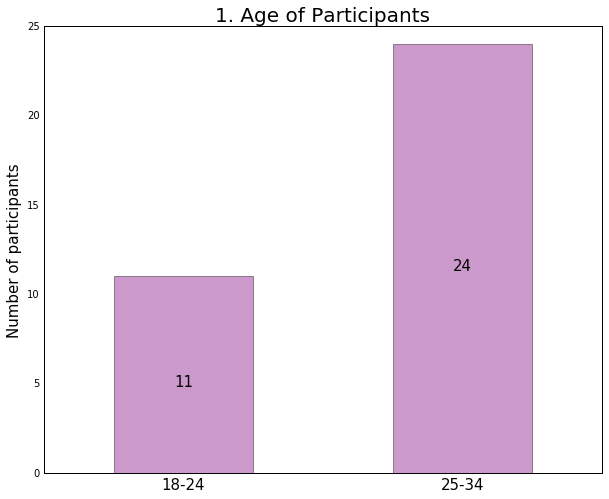

In [5]:
barchart('age', '1. Age of Participants',[], [], [])

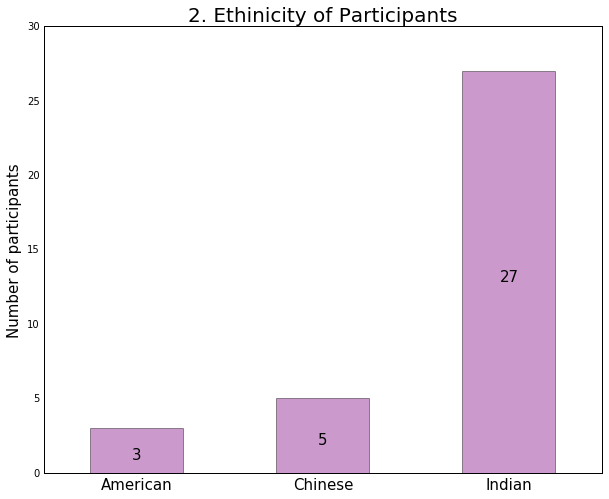

In [6]:
barchart('accent', '2. Ethinicity of Participants',[], [], [])

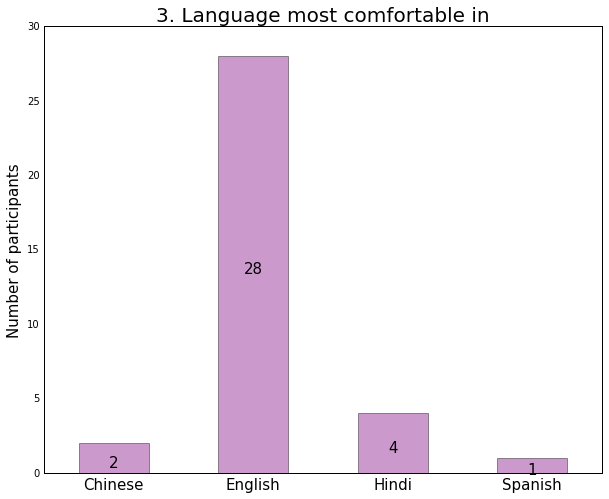

In [7]:
barchart('language', '3. Language most comfortable in',[], [], [])

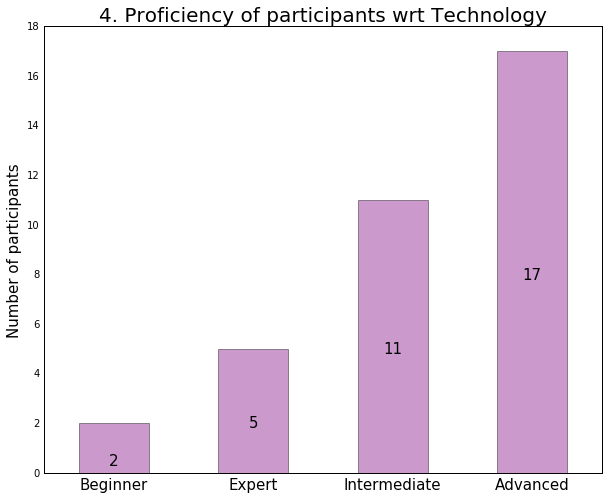

In [8]:
barchart('proficiency', '4. Proficiency of participants wrt Technology',[1,2,3,0], [], [])

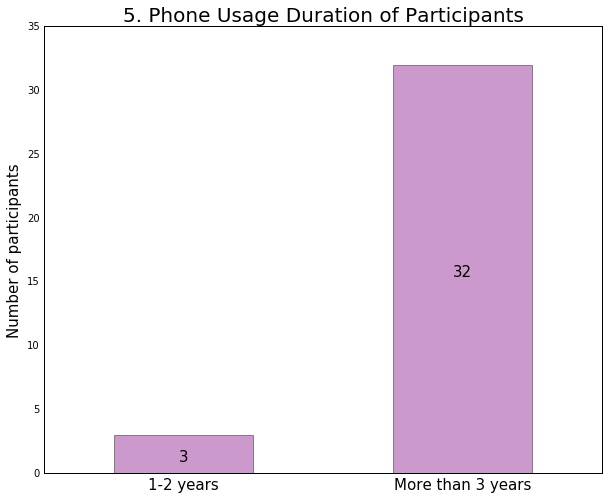

In [9]:
barchart('duration', '5. Phone Usage Duration of Participants',[], [], [])

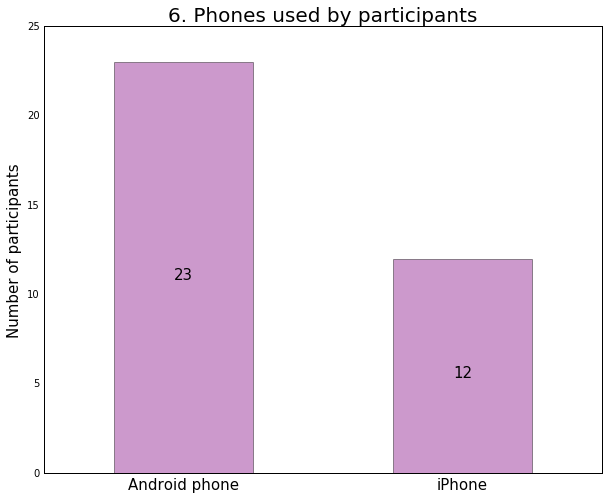

In [10]:
barchart('phone', '6. Phones used by participants', [], [], [])

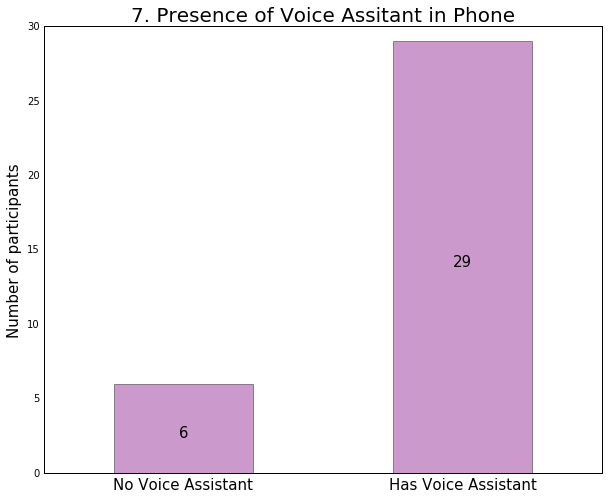

In [11]:
barchart('VA', '7. Presence of Voice Assitant in Phone',[], ['No Voice Assistant', 'Has Voice Assistant'], [])

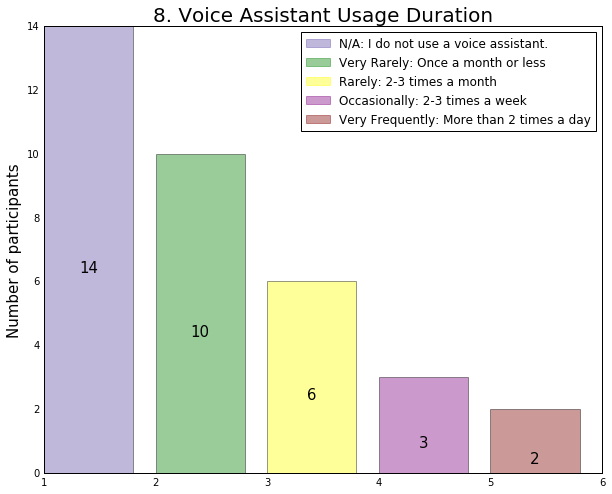

In [12]:
barchart('usage', '8. Voice Assistant Usage Duration',[0,4,2,1,3], [],
         ['#624ea7', 'g', 'yellow', 'purple', 'maroon'])

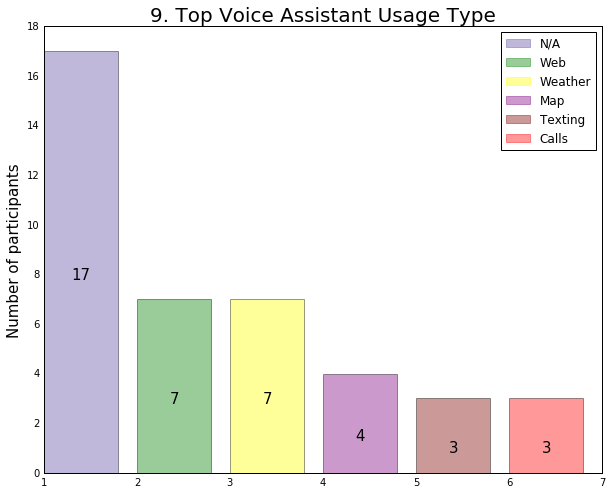

In [13]:
use_list = []
for i in range (len(survey['use'])): use_list.append(survey['use'][i])  # Not taking reason - other
use_list = list(sum(np.array(use_list)))
remove_index = [3,5,14,18]
for index in remove_index: use_list.pop(index)  # Not taking since this has zero responses (Email, Contact, Restaurant, Others)

label = ['N/A', 'Calls', 'Texting', 'Map','Weather', 'Web', 'Music', 'Calendar', 'Alarm', 'Reminder','Notes',
        'Sports', 'Listing', 'Social', 'Movie', 'Friends', 'Stock','Calculator']
    
top_index, top_item, top_label = [], [], []
for i in range(len(use_list)): 
    if use_list[i] > 3: top_index.append(i)

for i in range(len(top_index)): 
    top_item.append(use_list[i])
    top_label.append(label[i])
        
barchart(top_item, "9. Top Voice Assistant Usage Type", [0,5,4,3,2,1], top_label, ['#624ea7', 'g', 'yellow', 'purple', 'maroon','r'])

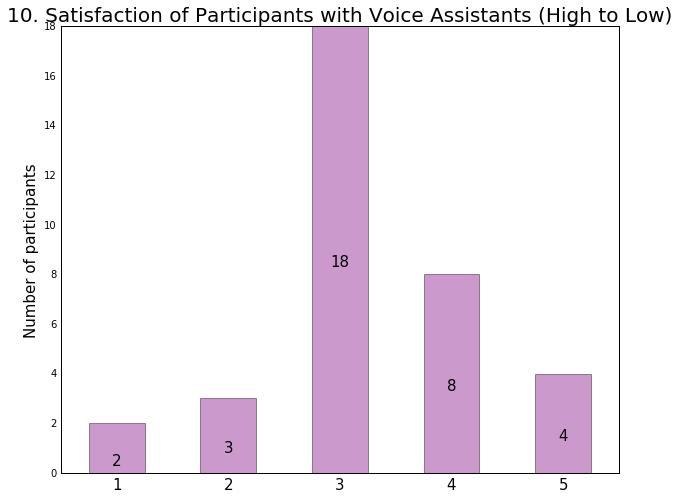

In [14]:
barchart('satisfied', '10. Satisfaction of Participants with Voice Assistants (High to Low)',[], [], [])

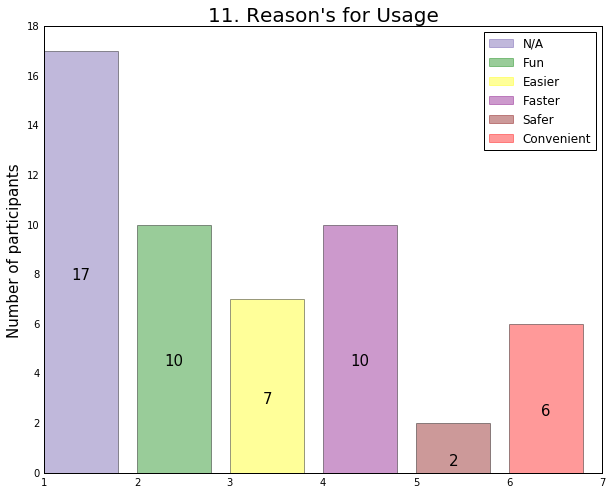

In [15]:
why_list = []
for i in range (len(survey['why'])): why_list.append(survey['why'][i])  # Not taking reason - other
why_list = list(sum(np.array(why_list)))
why_list.pop(6)  # Not taking since this has zero responses (Others)
label = ['Easier', 'Faster', 'Safer', 'Fun', 'Convenient','N/A', 'Others']

barchart(why_list, "11. Reason's for Usage", [5,3,0,1,2,4], label, ['#624ea7', 'g', 'yellow', 'purple', 'maroon','r'])

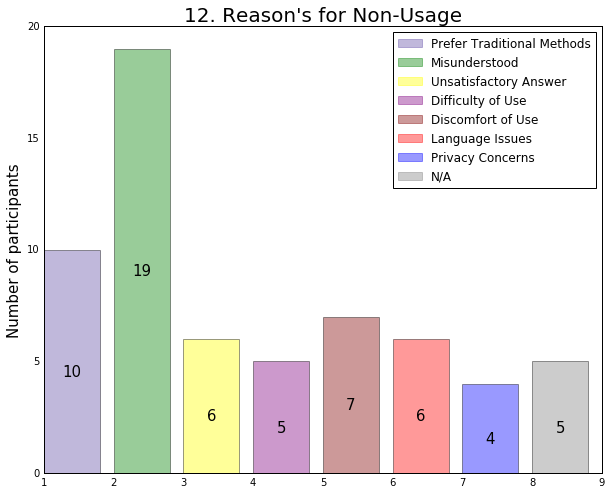

In [16]:
reason_list = []
for i in range (len(survey['reason'])): reason_list.append(survey['reason'][i][0:9])  # Not taking reason - other
reason_list = list(sum(np.array(reason_list)))
reason_list.pop(7)  # Not taking since this has zero responses (Didn't know it was there)
label = ['Misunderstood', 'Unsatisfactory Answer', 'Difficulty of Use', 'Discomfort of Use', 'Language Issues',
        'Privacy Concerns', 'Prefer Traditional Methods', 'N/A']

barchart(reason_list, "12. Reason's for Non-Usage",[6,0,1,2,3,4,5,7],
         label, ['#624ea7', 'g', 'yellow', 'purple', 'maroon','r','b','grey'])

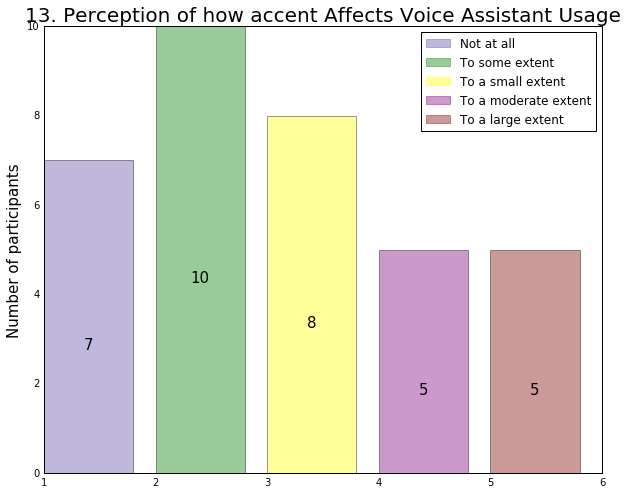

In [17]:
barchart('accent_affects', '13. Perception of how accent Affects Voice Assistant Usage',[0,4,3,2,1], [],
         ['#624ea7', 'g', 'yellow', 'purple', 'maroon'])

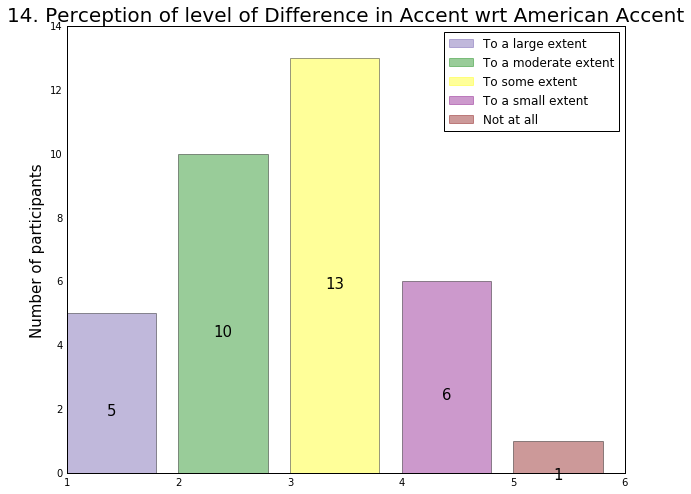

In [18]:
barchart('accent_differs', '14. Perception of level of Difference in Accent wrt American Accent',[1,2,4,3,0], [],
         ['#624ea7', 'g', 'yellow', 'purple', 'maroon'])

In [22]:
#distinct_categories = ['To a large extent', 'To a moderate extent', 'To some extent']
rsn=[]
for row in survey['reason']: rsn.append(row[0])

accent_vs_perception = survey[['accent_differs', 'reason']]
accent_vs_perception['count'] = np.ones(len(survey))
accent_vs_perception.loc[:,'reason'] = rsn

#accent_vs_perception = accent_vs_perception[accent_vs_perception['accent_differs'].isin(
#        distinct_categories)][['accent_differs','reason','count']]

avp = accent_vs_perception.groupby(['accent_differs','reason']).count()

total, misunderstood = [0], []
for i in range (len(avp['count'])):
    if avp.index.get_level_values('reason')[i] == 1: misunderstood.append(avp['count'][i])
    total.append(avp['count'][i])

print(total)
    
distinct_responses = len(set(avp.index.get_level_values('reason')))
total = [total[i] + total[i + 1] for i in range(0,len(total)-1,distinct_responses)]

print(total,misunderstood)
distinct_categories = sorted(list(set(avp.index.get_level_values('accent_differs'))))
distinct_categories[1]

[0, 1, 1, 4, 3, 7, 3, 3, 9, 4]
[1, 5, 10, 6, 13] [1, 4, 7, 3, 4]


C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nelson\Anaconda3\lib\site-packages\pandas\core\indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


'To a large extent'

[5.0, 10.0, 6.0, 13.0, 1.0]


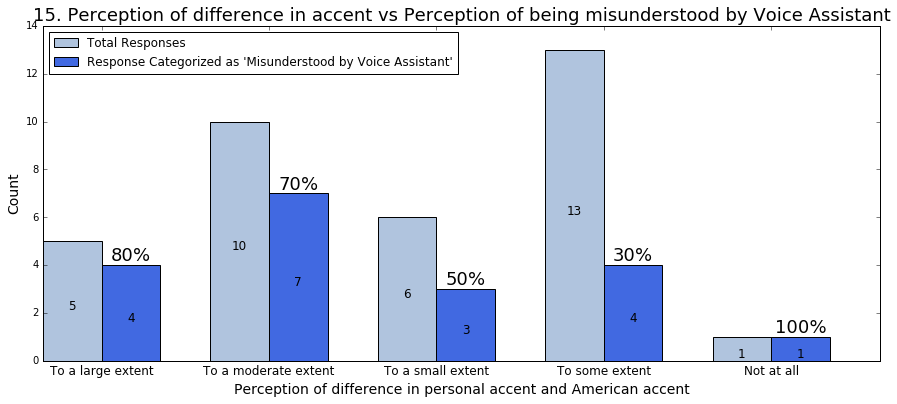

In [24]:
dc = [distinct_categories[1],distinct_categories[2],distinct_categories[3],
                       distinct_categories[4],distinct_categories[0]]
tt = [total[1], total[2], total[3], total[4], total[0]]
mu = [misunderstood[1], misunderstood[2], misunderstood[3], misunderstood[4], misunderstood[0]]

ind = np.arange(len(dc))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(1, figsize = (15,6))
rects1 = ax.bar(ind, tt, width, color='lightsteelblue')
rects2 = ax.bar(ind + width, mu, width, color='royalblue')

# add some text for labels, title and axes ticks
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Perception of difference in personal accent and American accent', fontsize=14)
ax.set_title('15. Perception of difference in accent vs Perception of being misunderstood by Voice Assistant', fontsize=18)
ax.set_xticks(ind + width)
ax.set_xticklabels(dc, fontsize=12)

ax.legend((rects1[0], rects2[0]), ('Total Responses', "Response Categorized as 'Misunderstood by Voice Assistant'"), loc=2)

def autolabel(rects, ht):
    cnt = 0
    for rect in rects:
        height = rect.get_height()
        if cnt < len(rects) and rect == rects1[cnt]:
            ht.append(height)
            cnt+=1
            ax.text(rect.get_x() + rect.get_width()/2., height/2-0.5, '%d' % int(height), ha='center', va='bottom', fontsize=12)
        else:
            ax.text(rect.get_x() + rect.get_width()/2., height/2-0.5, '%d' % int(height), ha='center', va='bottom', fontsize=12)
            ax.text(rect.get_x() + rect.get_width()/2., 
                    height, '%d' % (height/ht[cnt]*100)+'%', ha='center', va='bottom', fontsize=18)
            cnt+=1
    return ht

ht = []
ht = autolabel(rects1, ht)
print(ht)
autolabel(rects2, ht)

plt.savefig('15. Perception of difference in accent vs Perception of being misunderstood by Voice Assistant.png')
plt.show()